#Setup

In [1]:
!git init
!git remote add origin https://github.com/sgerloff/sustainable_deepfashion.git
!git pull origin main
!pip install -r requirements.txt

!make setup-preprocessed-gc CATEGORY_ID=1 MIN_PAIR_COUNT=10

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 771 (delta 103), reused 116 (delta 57), pack-reused 604
Receiving objects: 100% (771/771), 7.33 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (451/451), done.
From https://github.com/sgerloff/sustainable_deepfashion
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
     |████████████████████████████████| 706kB 6.0MB/s 
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22765 sha256=f87017d348fd0d39f852a46ac28ca3b241e4dfb348c852eb7c3ffc57e663c08d
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0891e979345d4
Successfully built zipfile38


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: data/processed/category_1_min_count_10/train/154327_11663.jpg  
  inflating: data/processed/category_1_min_count_10/train/012592_989.jpg  
  inflating: data/processed/category_1_min_count_10/train/182869_13838.jpg  
  inflating: data/processed/category_1_min_count_10/train/154386_11667.jpg  
  inflating: data/processed/category_1_min_count_10/train/080329_6097.jpg  
  inflating: data/processed/category_1_min_count_10/train/023473_1800.jpg  
  inflating: data/processed/category_1_min_count_10/train/000214_18.jpg  
  inflating: data/processed/category_1_min_count_10/train/047468_3615.jpg  
  inflating: data/processed/category_1_min_count_10/train/159943_12073.jpg  
  inflating: data/processed/category_1_min_count_10/train/052334_3992.jpg  
  inflating: data/processed/category_1_min_count_10/train/182827_13834.jpg  
  inflating: data/processed/category_1_min_count_10/train/086201_6551.jpg  
  inflating: data/p

#Learning Rate Estimation

In [ ]:
# !wget http://d2fcl18pl6lkip.cloudfront.net/models/effnet_freeze_basemodel.h5 -O models/effnet_freeze_basemodel.h5 

In [2]:
from src.instruction_utility import *

instruction_parser = InstructionParser("mobilenet_v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

9412608/9406464 [==============================] - 0s 0us/step


2592/2592 [==============================] - 477s 171ms/step - loss: 0.9955


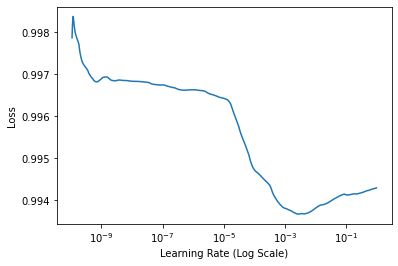

In [3]:
from src.models.learning_rate_estimator import LearningRateEstimator

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-10, 1e0, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 443s 170ms/step - loss: 0.9926


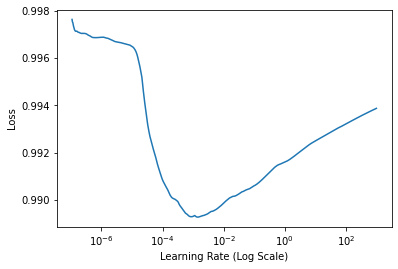

In [4]:
instruction_parser = InstructionParser("mobilenet_v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 591s 226ms/step - loss: 0.9825


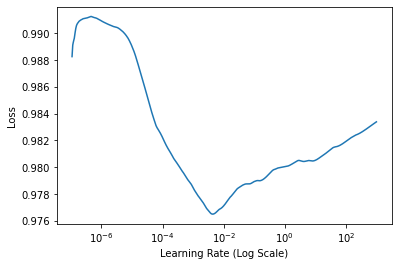

In [5]:
instruction_parser = InstructionParser("efficientnetb0_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 940s 361ms/step - loss: 0.9862


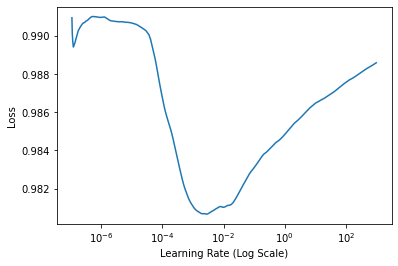

In [6]:
instruction_parser = InstructionParser("resnet50v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()